# Part 3 - Filters and convolutions

----------
### Slides covering basics of filters and filter kernels
----------

## Filtering images

In [4]:
import matplotlib
import numpy as np
from skimage import io, color, util, morphology
from skimage import filters, transform, exposure
from skimage.filters import rank
from scipy import ndimage

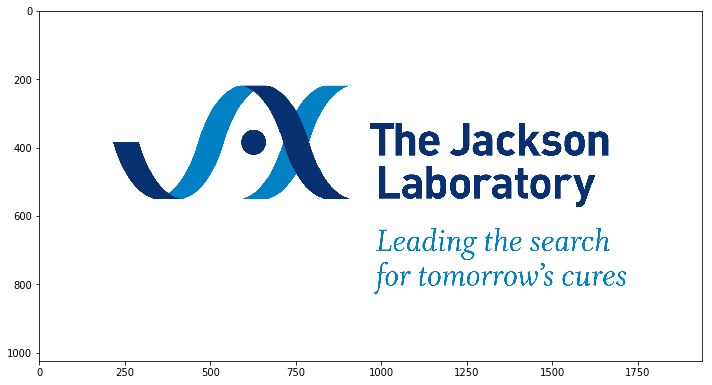

In [5]:
# Lets start with our JAX logo
matplotlib.rcParams['figure.figsize'] = [10.0, 10.0]
jax = io.imread('../data/jax.jpeg')
io.imshow(jax);

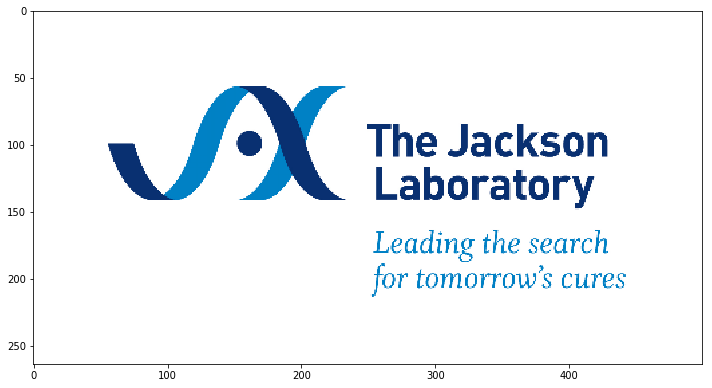

In [6]:
jax = transform.rescale(jax, .258) #downscaling
io.imshow(jax);

dtype('float64')

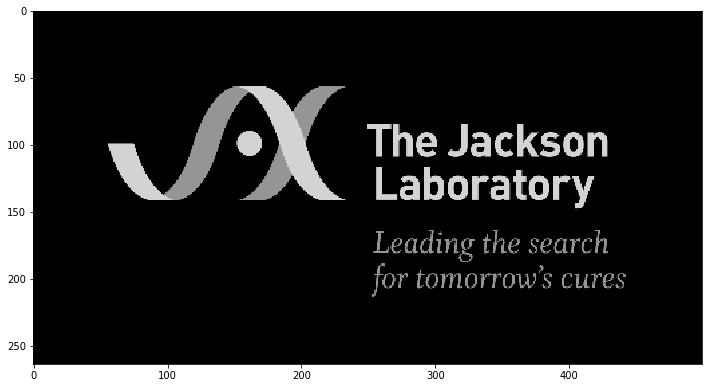

In [7]:
# Now lets change the logo to grayscale and invert
#Note that this is not the same operations we used to create a black and white image 
#as in the previous lesson!

#Why do you think there is a special scikit.image method to convert a color image to grayscale?

jax_gray = color.rgb2gray(jax)
jax_gray = util.invert(jax_gray)
io.imshow(jax_gray);
jax_gray.dtype #note the data type

/anaconda3/envs/ImPyClass2/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


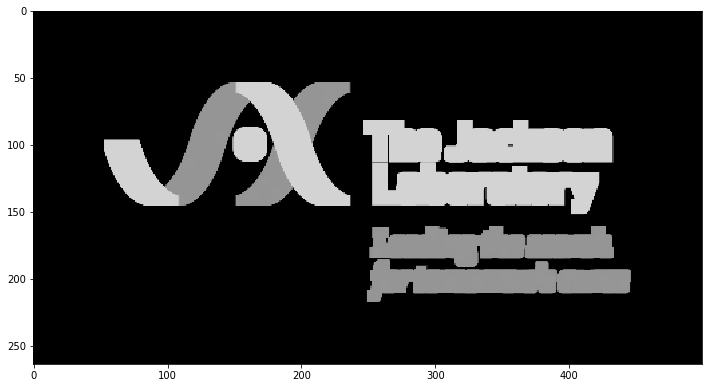

In [8]:
# Now lets apply a max filter

# first need to create a "window"
window = morphology.square(8) #play with the size of the window!

jax_max = rank.maximum(jax_gray, window)
io.imshow(jax_max);

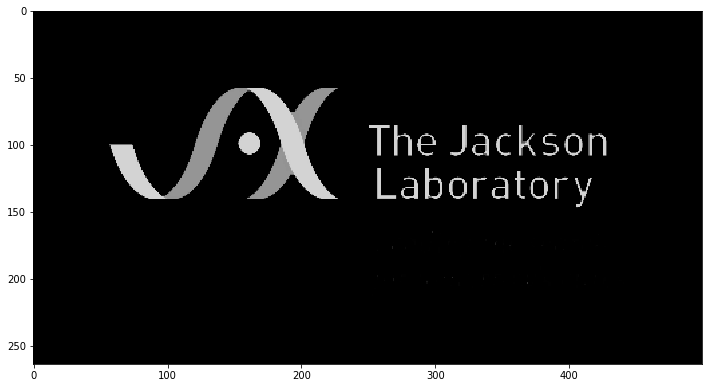

In [9]:
# Here is the same with a "min" filter

window = morphology.square(3) #play with the size of the window!
jax_min = rank.minimum(jax_gray, window)
io.imshow(jax_min);

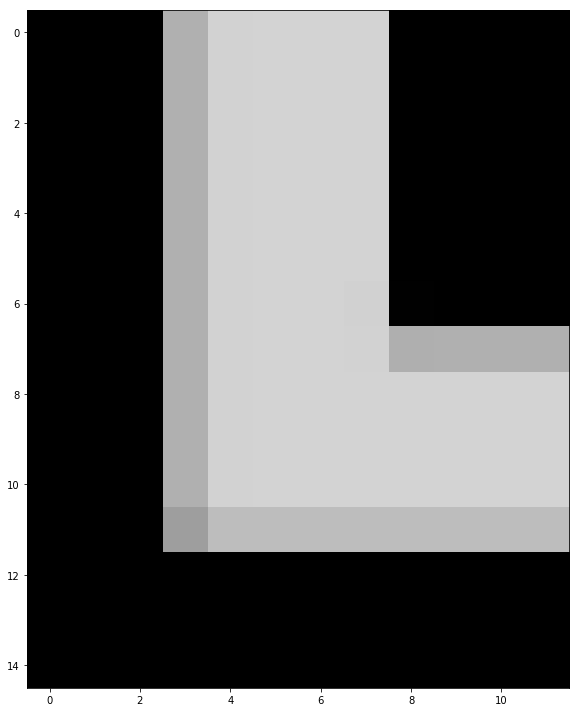

In [10]:
# lets convert the image to 'uint8' to make the arrays easier to look at
jax_gray = util.img_as_ubyte(jax_gray)

# Look at the pixels around the 'L' in Laboratory
io.imshow(jax_gray[130:145,253:265]);

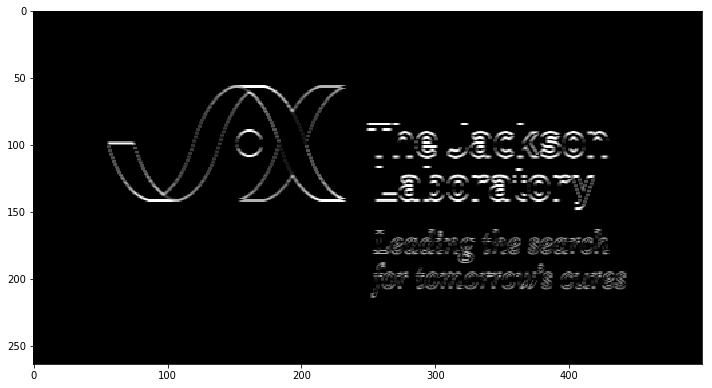

In [11]:
# scikit-image has a great set of convolutional filters
#
# prewitt-horizontal:
# 1  1  1
# 0  0  0
#-1 -1 -1

jax_h_edges = filters.prewitt_h(jax_gray)

#normalize
jax_h_edges = abs(jax_h_edges)
jax_h_edges = exposure.rescale_intensity(jax_h_edges)
jax_h_edges = util.img_as_ubyte(jax_h_edges)

io.imshow(jax_h_edges);

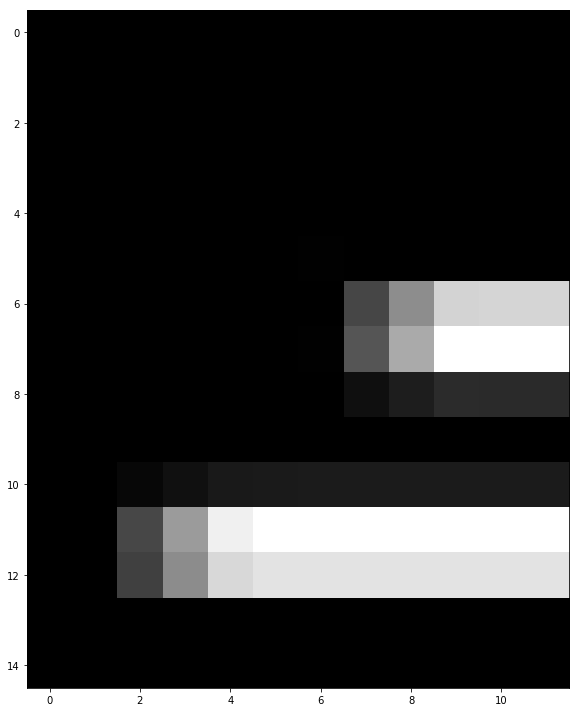

In [12]:
io.imshow(jax_h_edges[130:145, 253:265]);

In [13]:
print(jax_gray[130:145, 253:265])
print()
print(jax_h_edges[130:145, 253:265])

[[  0   0   0 176 210 211 211 211   0   0   0   0]
 [  0   0   0 176 210 211 211 211   0   0   0   0]
 [  0   0   0 176 210 211 211 211   0   0   0   0]
 [  0   0   0 176 210 211 211 211   0   0   0   0]
 [  0   0   0 176 210 211 211 211   0   0   0   0]
 [  0   0   0 176 210 211 211 211   0   0   0   0]
 [  0   0   0 176 210 211 211 209   1   0   0   0]
 [  0   0   0 176 210 211 211 210 175 176 176 176]
 [  0   0   0 176 210 211 211 211 211 211 211 211]
 [  0   0   0 176 210 211 211 211 211 211 211 211]
 [  0   0   0 176 210 211 211 211 211 211 211 211]
 [  0   0   0 158 189 189 189 189 189 189 189 189]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]

[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0

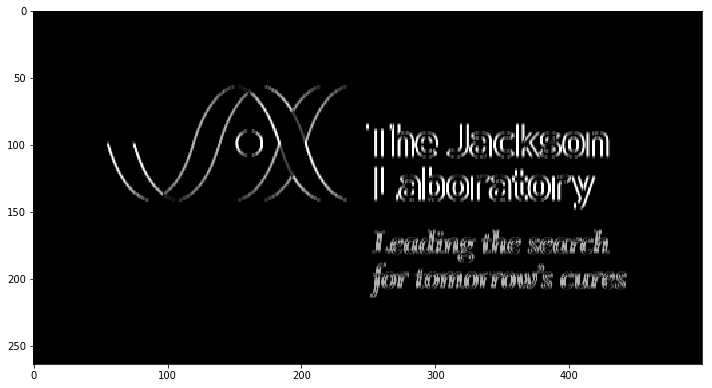

In [14]:
# prewitt-vertical:
# 1  0 -1
# 1  0 -1
# 1  0 -1

jax_v_edges = filters.prewitt_v(jax_gray)

#normalize
jax_v_edges = abs(jax_v_edges)
jax_v_edges = exposure.rescale_intensity(jax_v_edges)
jax_v_edges = util.img_as_ubyte(jax_v_edges)

io.imshow(jax_v_edges);

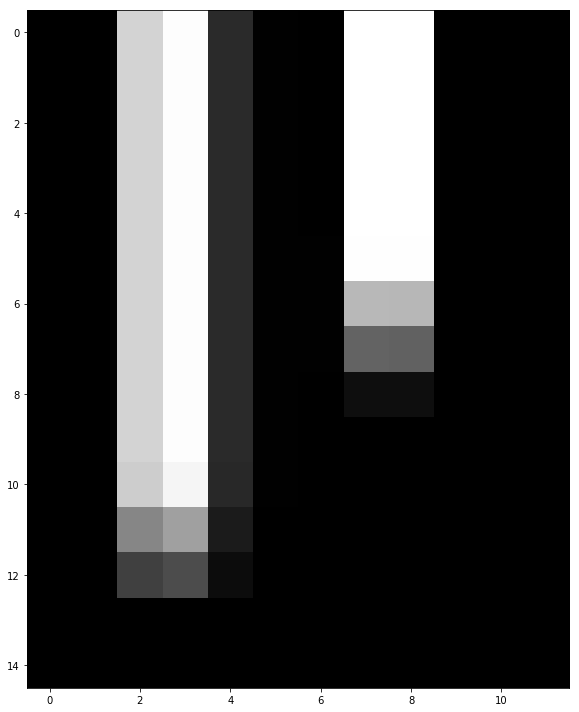

In [15]:
io.imshow(jax_v_edges[130:145, 253:265]);

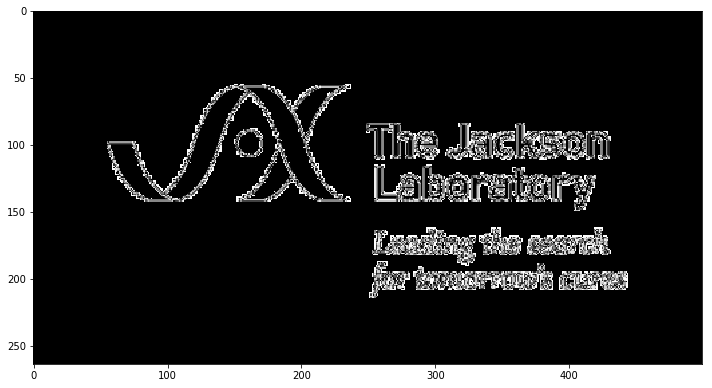

In [16]:
# To do a convolution with an arbitrary kernel, we need to use another package, scipy.ndimage
#ndimage works on numpy arrays like scikit-image, so it is straightford to go back and forth

kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

jax_edge = ndimage.convolve(jax_gray, kernel)
io.imshow(jax_edge);

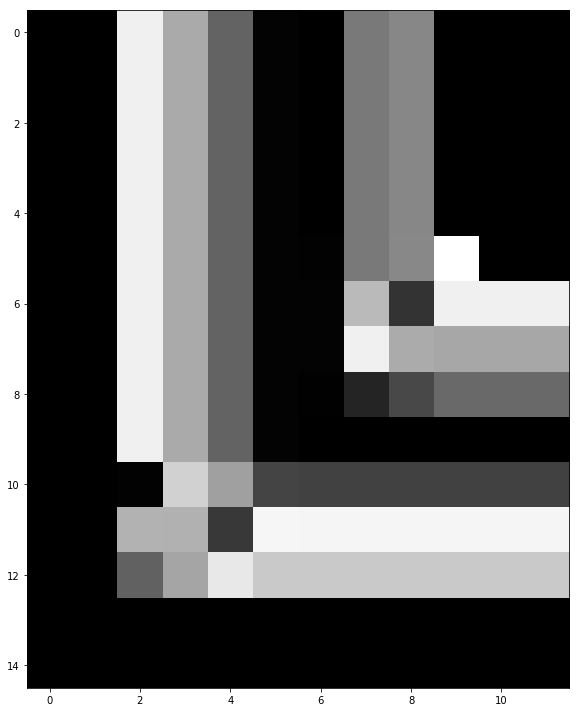

In [17]:
# Is the output here surprising? 

hollow_l = jax_edge[130:145,253:265]
io.imshow(hollow_l);

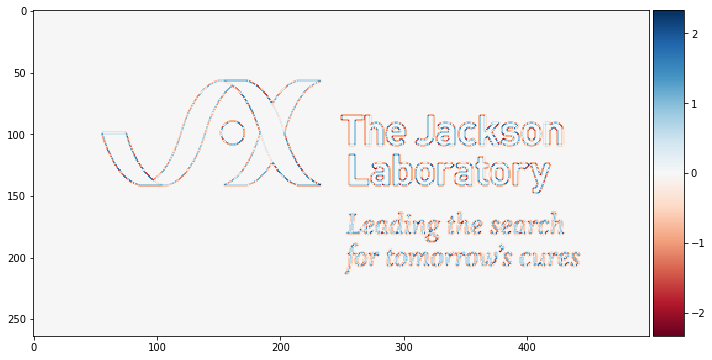

In [18]:
# The kernel we used above:

# -1 -1 -1
# -1  8 -1
# -1 -1 -1

# is actually a discrete approximation of the Laplace operator
# We can apply a "better" Laplacian with scikit-image

jax_edge2 = filters.laplace(jax_gray)

io.imshow(jax_edge2);

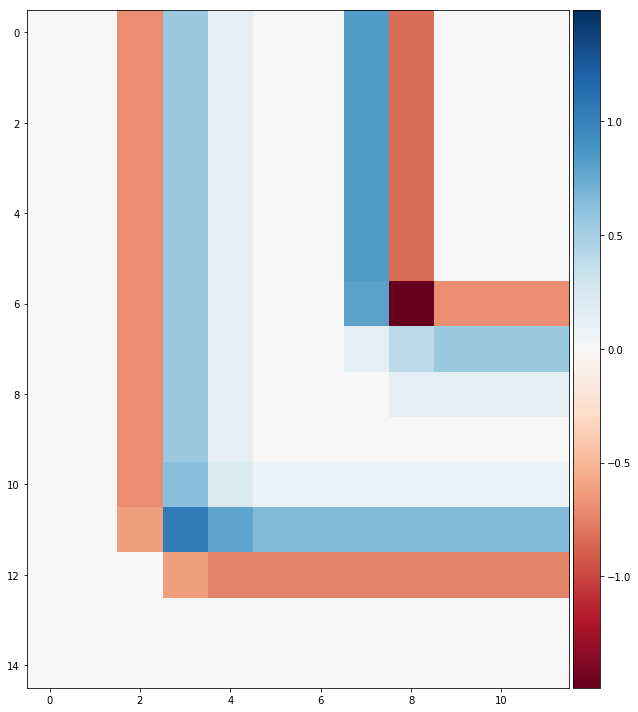

In [19]:
# Note the range of output values. What has happened to our dtype?

io.imshow(jax_edge2[130:145, 253:265]);

In [20]:
jax_edge2[130:145, 253:265]

array([[ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  0.        ,  0.82745098, -0.82745098,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.69019608,  0.55686275,  0.12941176,
         0.00392157,  

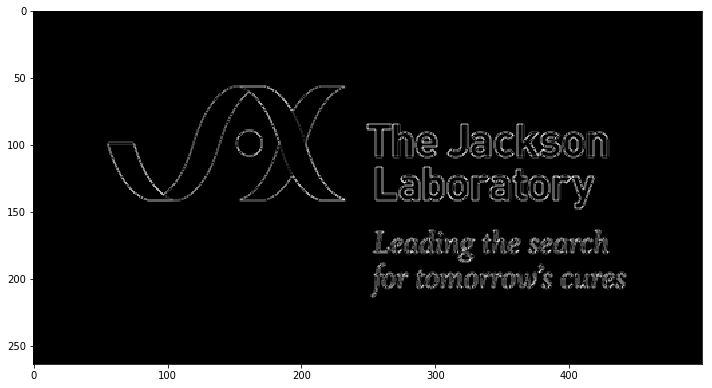

In [21]:
# To make our laplacian-filtered image a little nicer to look at,
#We can rescale the range and convert to 'uint8'

jax_edge3 = abs(jax_edge2)
jax_edge3 = exposure.rescale_intensity(jax_edge3) #stretch values to full range of dtype
jax_edge3 = util.img_as_ubyte(jax_edge3)
io.imshow(jax_edge3); 

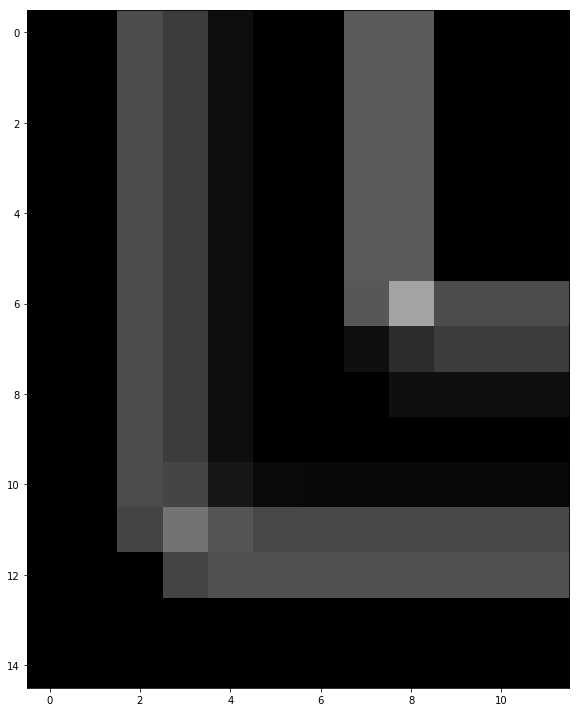

In [22]:
#why does this look so much better than the output of our 'manual' Laplacian?
io.imshow(jax_edge3[130:145, 253:265]); 

In [23]:
# Lets bring our astronaut image back for an exercise

from skimage import data
image = data.astronaut()

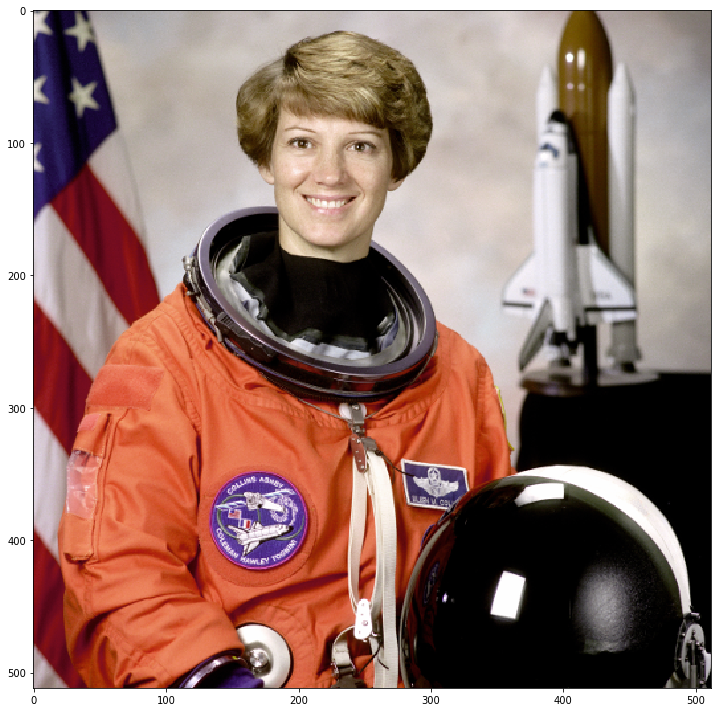

In [24]:
io.imshow(image);

## Exercise

1. Convert the astronaut image to grayscale and highlight edges in the picture.
2. Thicken the edges to make them stand out better.

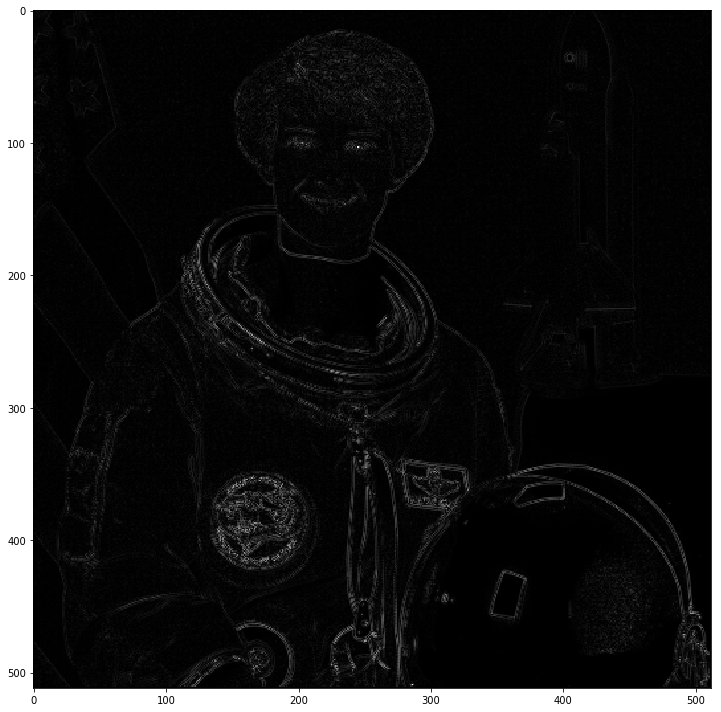

In [25]:
image = color.rgb2gray(image)

edges = filters.laplace(image)

edges = abs(edges)
edges = exposure.rescale_intensity(edges)
edges = util.img_as_ubyte(edges)

io.imshow(edges);

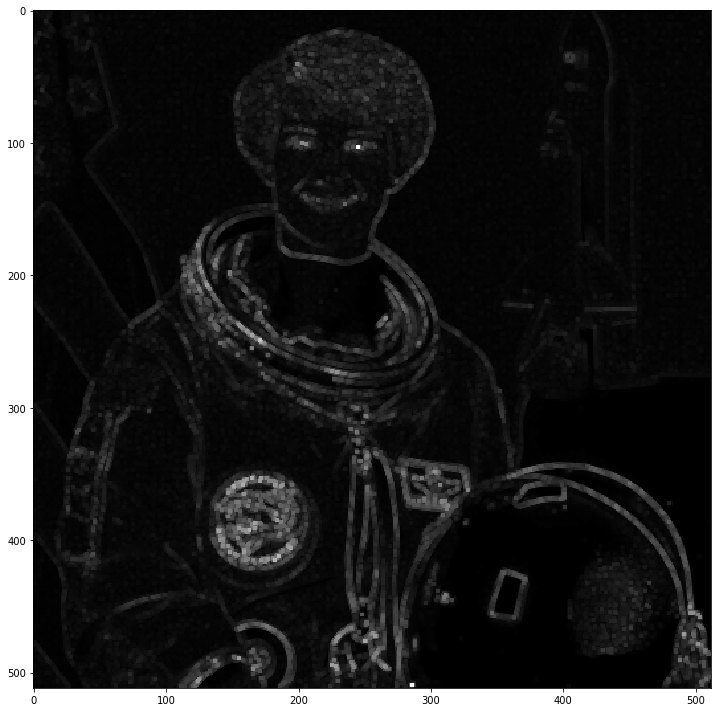

In [26]:
window = morphology.square(3)
thick_edges = rank.maximum(edges, window)
io.imshow(thick_edges);

## Gaussian filtering

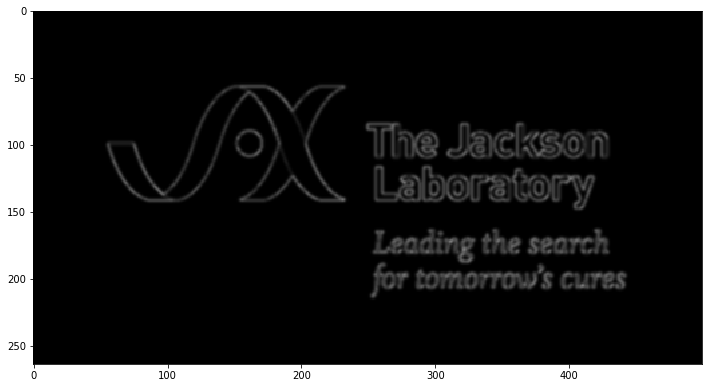

In [27]:
# Sometimes it is useful to apply a blur to noisy images

sigma=1 #play with this parameter
jax_blur = filters.gaussian(jax_edge3, sigma=sigma)
io.imshow(jax_blur);

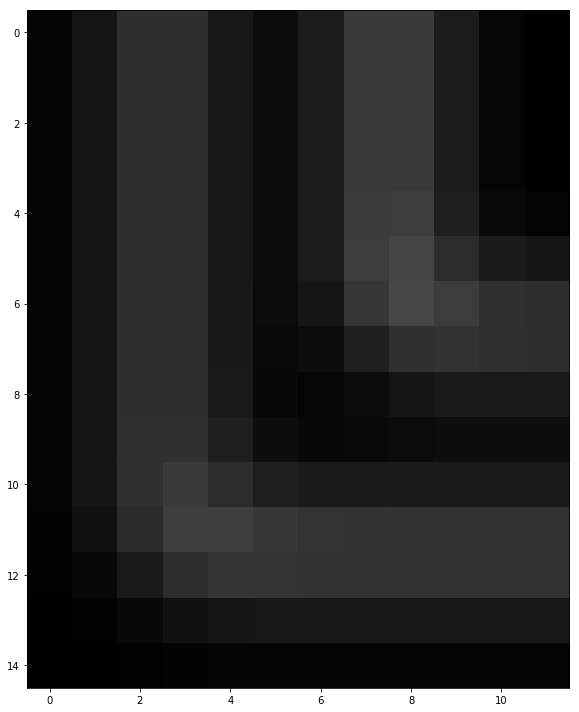

In [28]:
io.imshow(jax_blur[130:145, 253:265]);

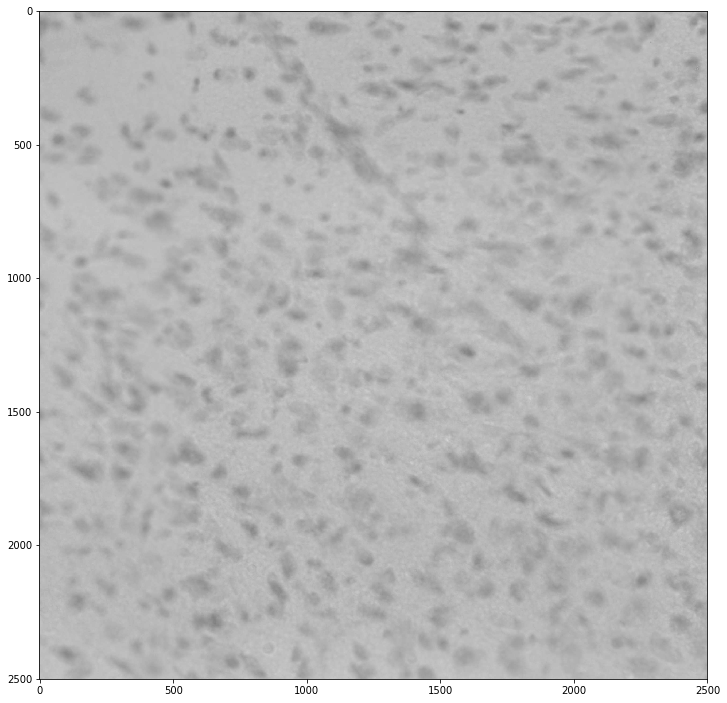

In [29]:
# To show why blurring is so important, lets take a look at 
#some real data. These are stained nuclei (I think) in a brain slice.

cells = io.imread('../data/cells.tif')
io.imshow(cells);

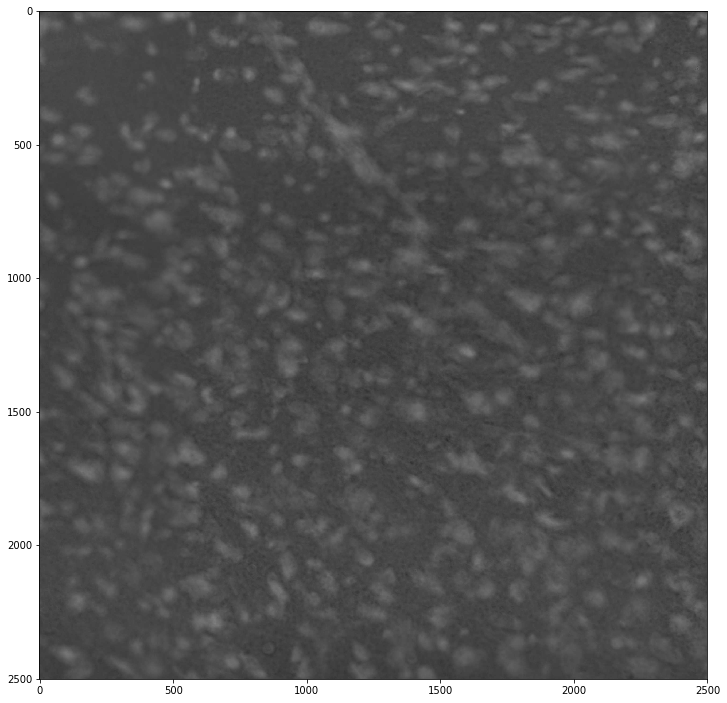

In [30]:
# We usually want bright signal on a dark background, so invert

cells_i = util.invert(cells)
io.imshow(cells_i);

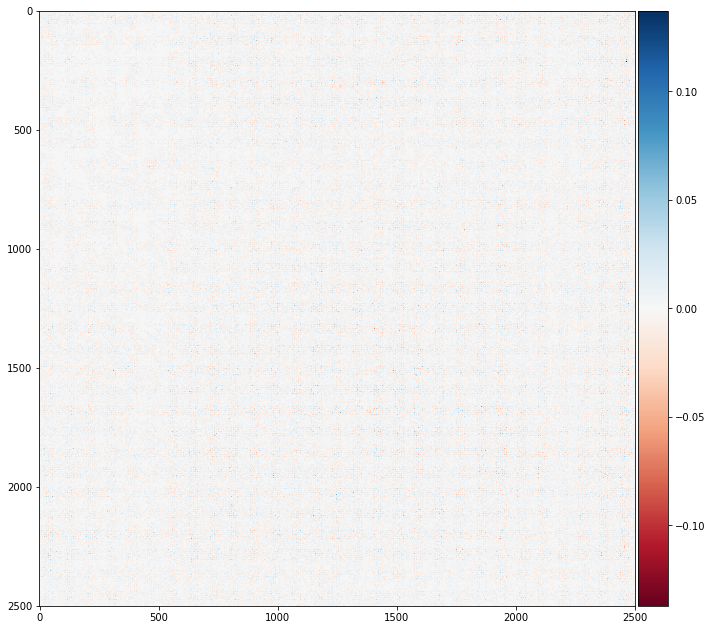

In [31]:
cells_laplace = filters.laplace(cells_i)
io.imshow(cells_laplace);

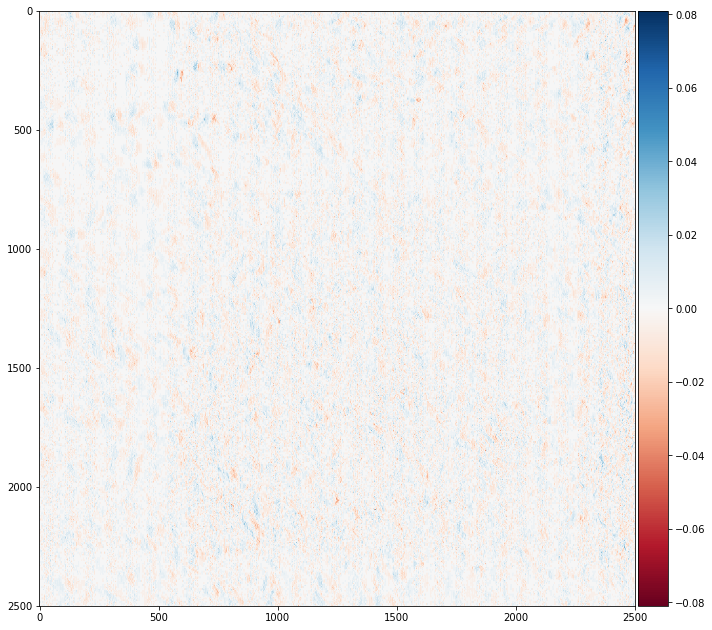

In [32]:
cells_v = filters.prewitt_v(cells_i)
io.imshow(cells_v);

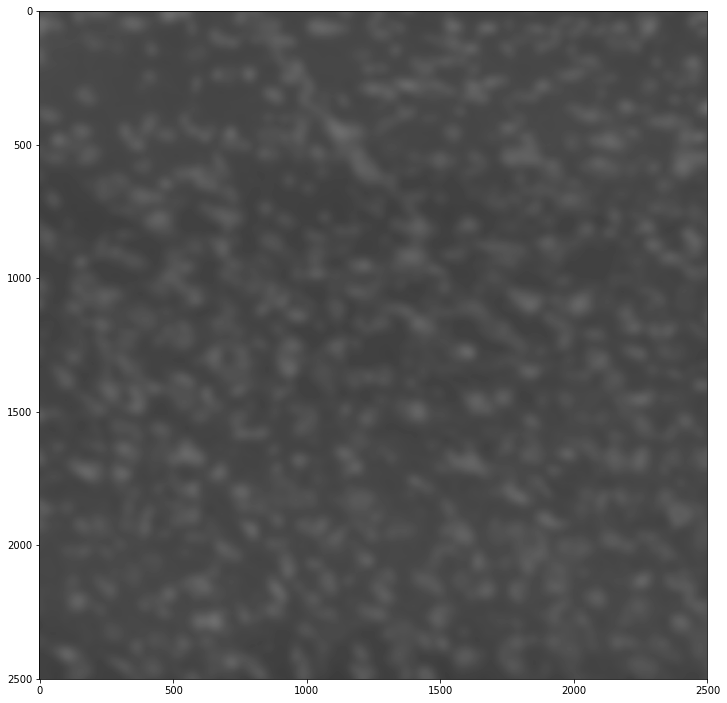

In [33]:
# The noise overwhelms the image. We can fix our edge detectors by first
#applying some guassian blur.

sigma=15 
cell_gaussian = filters.gaussian(cells_i, sigma=sigma)
io.imshow(cell_gaussian);

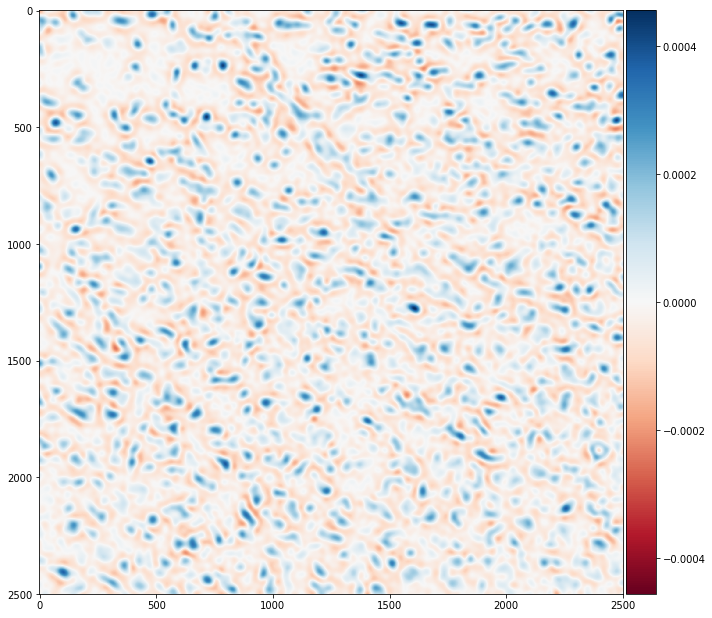

In [34]:
cell_log = filters.laplace(cell_gaussian)
io.imshow(cell_log);

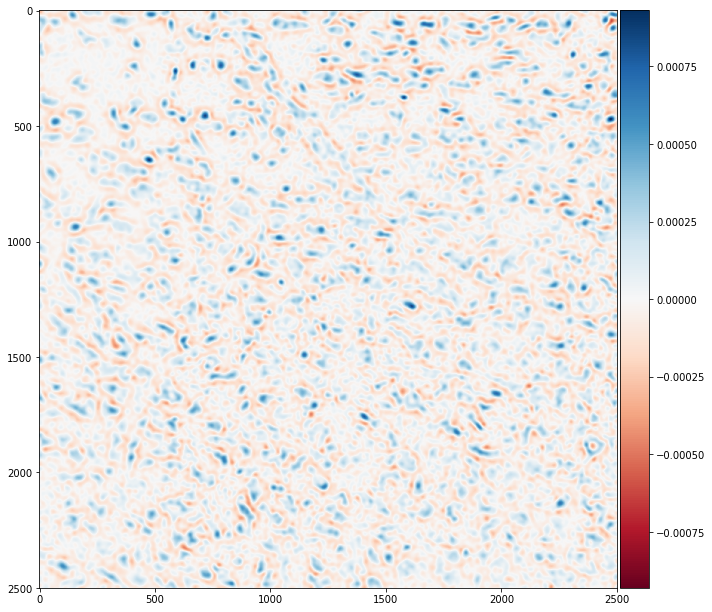

In [35]:
# Changing the size of the gaussian can help to target certain size ranges of 'blobs'
#in the image. Play with the sigma parameter to see what works well.

sigma=10
cell_gaussian = filters.gaussian(cells_i, sigma=sigma)
cell_log = filters.laplace(cell_gaussian)
io.imshow(cell_log);

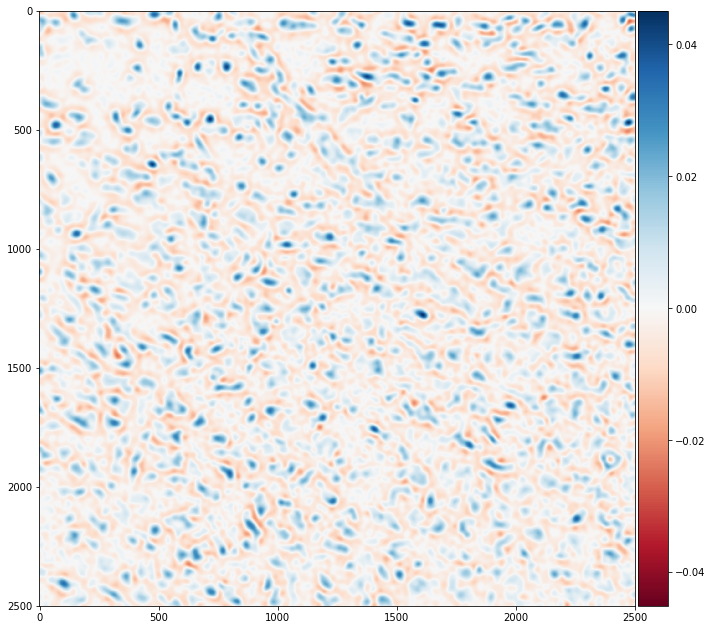

In [36]:
# Another similar trick to find edges in noisy images is to
#take the difference of two gaussians.
#
# Note: When the sigma of the 'wider' gaussian is roughly 1.6x
#the smaller gaussian, the overall effect is nearly equivalent
#to the Laplacian of Gaussian.

sigma_A = 10
sigma_B = 16
cell_gA = filters.gaussian(cells_i, sigma=sigma_A)
cell_gB = filters.gaussian(cells_i, sigma=sigma_B)
cell_dog = cell_gA - cell_gB
io.imshow(cell_dog);

## Exercise

1. Set all background (i.e. not a cell) pixels to zero in the cells_i image.
 * Hint 1: Remember np.where()
 * Hint 2: This isn't going to be perfect! Find the settings that work the best

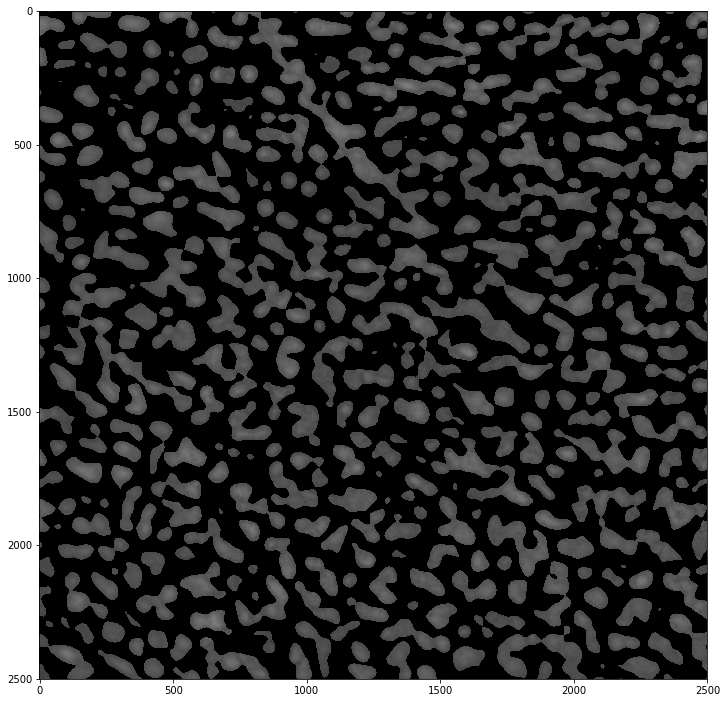

In [37]:
cells_i = util.invert(cells)
sigma=20
cell_gaussian = filters.gaussian(cells_i, sigma=sigma)
cell_log = filters.laplace(cell_gaussian)
cells_i[np.where(cell_log <= 0)] = 0
io.imshow(cells_i);

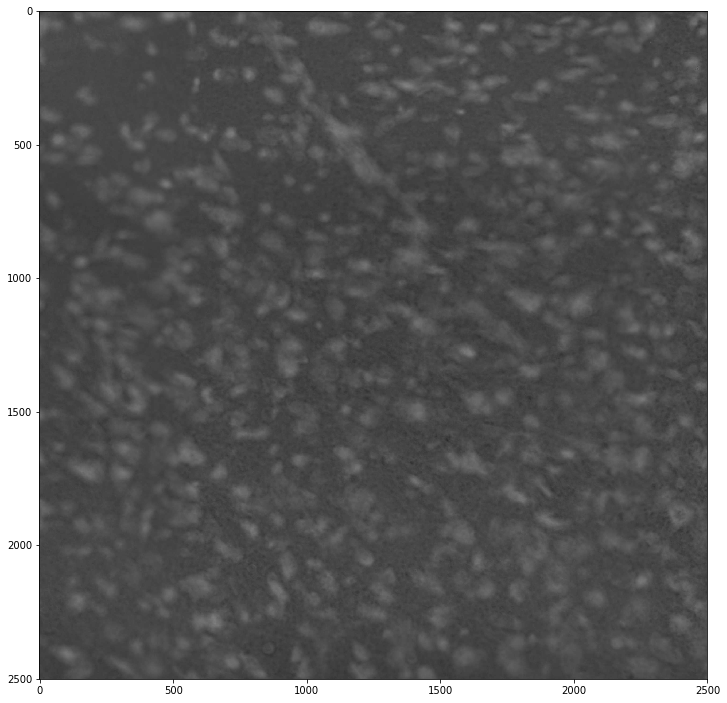

In [38]:
io.imshow(util.invert(cells));